## Задачи классификации

Алгоритмы, которые выдают вероятность

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('students.csv')
df_cut=df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_cut=df_cut.dropna()

df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_test_cut=df_test_cut.dropna()

model=RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number']].values.reshape(-1,4), y=df_cut.Sex.values)

result=model.predict_proba(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number']].values.reshape(-1,4))
print(result) # вероятности принадлежности к классам

[[0.1119842  0.8880158 ]
 [0.96095378 0.03904622]
 [0.9303843  0.0696157 ]
 [0.95480426 0.04519574]
 [0.07229695 0.92770305]
 [0.9592805  0.0407195 ]
 [0.95523625 0.04476375]
 [0.1968501  0.8031499 ]
 [0.14498541 0.85501459]
 [0.60529848 0.39470152]
 [0.6819062  0.3180938 ]
 [0.1143206  0.8856794 ]
 [0.75407153 0.24592847]
 [0.9592805  0.0407195 ]
 [0.96132415 0.03867585]
 [0.10439874 0.89560126]
 [0.15853126 0.84146874]
 [0.05722533 0.94277467]
 [0.95848145 0.04151855]
 [0.09863631 0.90136369]
 [0.09435884 0.90564116]
 [0.09435884 0.90564116]
 [0.13461655 0.86538345]
 [0.96178712 0.03821288]
 [0.90446726 0.09553274]
 [0.70389532 0.29610468]
 [0.09693027 0.90306973]
 [0.13157186 0.86842814]
 [0.90963642 0.09036358]
 [0.96132415 0.03867585]
 [0.96132415 0.03867585]
 [0.94816559 0.05183441]
 [0.96132415 0.03867585]
 [0.91795221 0.08204779]
 [0.15373056 0.84626944]
 [0.07641884 0.92358116]
 [0.0790702  0.9209298 ]
 [0.11603095 0.88396905]
 [0.9592805  0.0407195 ]
 [0.96132415 0.03867585]


In [2]:
df_test_cut['probability 0']=result[:,0]
df_test_cut['probability 1']=result[:,1]
df_test_cut.head()

,Growth,Weight,Sex,Hair length,Children number,probability 0,probability 1
0,180.0,78.0,мужской,1.2,2.0,0.111984,0.888016
1,167.0,50.0,женский,30.0,2.0,0.960954,0.039046
3,156.0,47.0,женский,20.0,2.0,0.930384,0.069616
5,150.0,40.0,женский,30.0,2.0,0.954804,0.045196
7,183.0,80.0,мужской,2.0,0.0,0.072297,0.927703


In [3]:
df_test_cut[(df_test_cut['probability 1']<0.5)&(df_test_cut['Sex']=='мужской')].head()

,Growth,Weight,Sex,Hair length,Children number,probability 0,probability 1
78,175.0,50.0,мужской,40.0,2.0,0.707625,0.292375


______

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv('students.csv')
df_cut=df[['Growth', 'Weight', 'Sex']]
df_cut=df_cut.dropna()

df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Growth', 'Weight', 'Sex']]
df_test_cut=df_test_cut.dropna()

model=RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth', 'Weight']].values.reshape(-1,2), y=df_cut.Sex.values)

result=model.predict_proba(df_test_cut[['Growth', 'Weight']].values.reshape(-1,2))
df_test_cut['probability 0']=result[:,0]
df_test_cut['probability 1']=result[:,1]

df_test_cut.sort_values(by='probability 0', ascending=False)

,Growth,Weight,Sex,probability 0,probability 1
61,162.0,49.0,женский,0.943150,0.056850
79,162.0,49.0,женский,0.943150,0.056850
17,159.0,49.0,женский,0.943150,0.056850
52,160.0,50.0,женский,0.943080,0.056920
39,157.0,49.0,женский,0.941509,0.058491
...,...,...,...,...,...
57,186.0,100.0,мужской,0.085050,0.914950
33,196.0,97.0,мужской,0.085050,0.914950
28,193.0,105.0,мужской,0.085050,0.914950
23,194.0,97.0,мужской,0.085050,0.914950


## работа с категориальными признаками

In [5]:
import pandas as pd
import seaborn as sns
from sklearn import tree

df=pd.read_csv('students.csv')

In [6]:
from sklearn import preprocessing
coder = preprocessing.LabelEncoder()
#coder.fit(df.Sex)
#coder.transform(df.Sex)

#df.Sex=coder.transform(df.Sex)

In [7]:
for name in ['Sex','Coin','Animal','Army']:
  coder.fit(df[name])
  df[name]=coder.transform(df[name])

In [8]:
df_cut=df[['Growth', 'Weight', 'Hair length', 'Children number', 'Sex', 'Coin','Animal','Army']]
df_cut=df_cut.dropna()

df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Growth', 'Weight', 'Hair length', 'Children number','Sex', 'Coin','Animal','Army']]
df_test_cut=df_test_cut.dropna()

for name in ['Sex','Coin','Animal','Army']:
  coder.fit(df_test_cut[name])
  df_test_cut[name]=coder.transform(df_test_cut[name])

In [9]:
model = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number', 'Coin','Animal','Army']].values.reshape(-1,7), y=df_cut.Sex.values)
#df_cut['Predict']=model.predict(df_cut[['Growth', 'Weight', 'Hair length', 'Children number', 'Coin','Animal','Army']].values.reshape(-1,7))

DecisionTreeClassifier(max_depth=4, random_state=0)

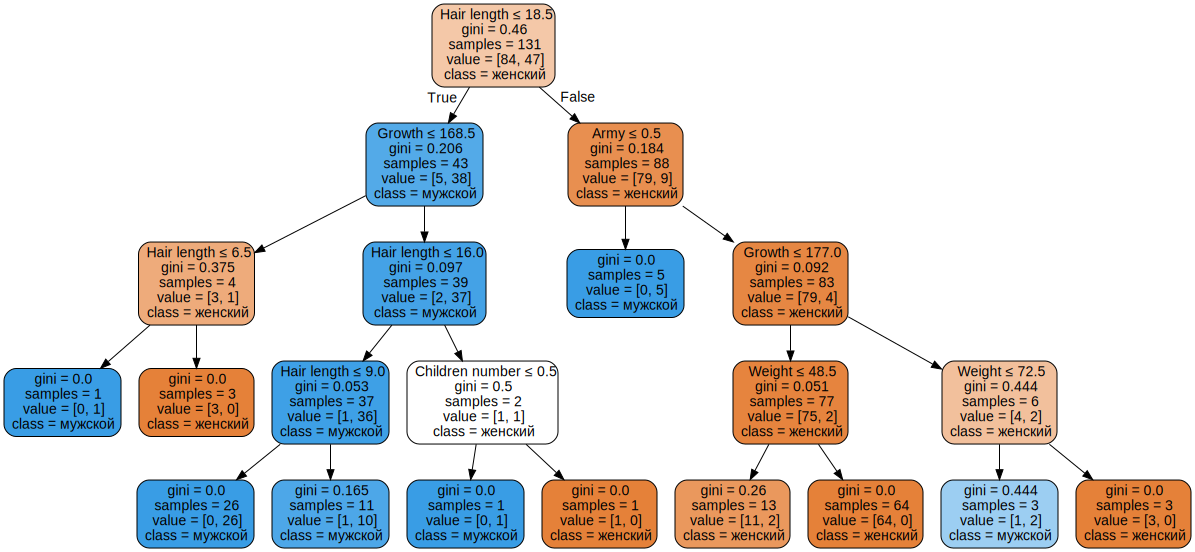

In [10]:
#tree.plot_tree(model, feature_names=['Growth', 'Weight', 'Hair length', 'Children number', 'Coin','Animal','Army'], class_names=['женский', 'мужской'], filled=True)

import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=['Growth', 'Weight', 'Hair length', 'Children number', 'Coin','Animal','Army'],  class_names=['женский', 'мужской'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
df_test_cut['Predict']=model.predict(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number', 'Coin','Animal','Army']].values.reshape(-1,7))

In [12]:
pd.crosstab(df_test_cut['Predict'],df_test_cut['Sex'])

Sex,0,1
Predict,,
0,40,0
1,2,26


## кодирование категориальных признаков

-- узнаем значимость каждого признака в предсказании пола:

In [13]:
import pandas as pd
import seaborn as sns
from sklearn import tree

df=pd.read_csv('students.csv')
df=df.dropna()

for name in ['Glasses', 'Sex', 'Problems in last semester', 'Coin', 'Rock paper scissors', 'Animal', 'Your rating in university', 'Fastfood', 'Army', 'Hostel', 'Chocolate', 'Strange people', 'Your insitute', 'Brother-sister', 'Plane seat']:
  coder.fit(df[name])
  df[name]=coder.transform(df[name])

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df.Sex)
result.feature_importances_

array([0.0060821 , 0.0559543 , 0.07529206, 0.0038616 , 0.00629107,
       0.00246357, 0.00818006, 0.00440787, 0.01337865, 0.02959858,
       0.00091663, 0.00276626, 0.00550297, 0.00091268, 0.00365453,
       0.00133382, 0.00448924, 0.00226872, 0.00703759, 0.00432617,
       0.00180761, 0.01336757, 0.00762275, 0.46384527, 0.00561607,
       0.024913  , 0.00172882, 0.0034222 , 0.00344157, 0.00281795,
       0.00275503, 0.00448343, 0.00299426, 0.0059372 , 0.10255139,
       0.00160677, 0.05532031, 0.00532949, 0.00712219, 0.00459995,
       0.00611327, 0.0025747 , 0.00246808, 0.00534605, 0.00325416,
       0.00308649, 0.01327211, 0.00388385])

In [15]:
features_table=pd.DataFrame(result.feature_importances_, index=df.columns, columns=['importance'])
print(features_table)

                             importance
Age                            0.006082
Growth                         0.055954
Shoe size                      0.075292
Course number                  0.003862
Year of birth                  0.006291
Friend number                  0.002464
Russian rating                 0.008180
Maths rating                   0.004408
Physics rating                 0.013379
Computer science rating        0.029599
Chemistry rating               0.000917
Literature rating              0.002766
History rating                 0.005503
Geography rating               0.000913
Biology rating                 0.003655
Foreign language rating        0.001334
Social science rating          0.004489
Distance to home km            0.002269
Minutes to first class         0.007038
Children number                0.004326
Removed teeth                  0.001808
Weight                         0.013368
Glasses                        0.007623
Sex                            0.463845


In [16]:
features_table.sort_values(by='importance', ascending=False)

,importance
Sex,0.463845
Army,0.102551
Shoe size,0.075292
Growth,0.055954
Hair length,0.055320
Computer science rating,0.029599
Coin,0.024913
Physics rating,0.013379
Weight,0.013368
Middle and ring finger,0.013272


In [17]:
df=pd.read_csv('students.csv')
df_cut=df[['Army', 'Shoe size', 'Growth', 'Hair length', 'Coin', 'Computer science rating', 'Weight', 'Sex']]
df_cut=df_cut.dropna()

In [18]:
df_cut=pd.get_dummies(df_cut, drop_first=True)
df_cut.head()

,Shoe size,Growth,Hair length,Computer science rating,Weight,Army_не призовут (по разным причинам),Coin_Решка,Sex_мужской
0,40,170,50.0,84,64.0,1,0,0
1,43,191,7.0,72,73.0,1,0,1
2,41,172,4.0,0,60.0,0,1,1
3,38,168,20.0,0,59.0,1,1,0
4,36,159,55.0,0,57.0,1,0,0


In [19]:
#model.fit(df_cut.drop('Sex', axis=1), df_cut['Sex'])

In [20]:
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=3)
model.fit(df_cut.drop('Sex_мужской', axis=1).values.reshape(-1,7), y=df_cut['Sex_мужской'].values)

DecisionTreeClassifier(max_depth=3)

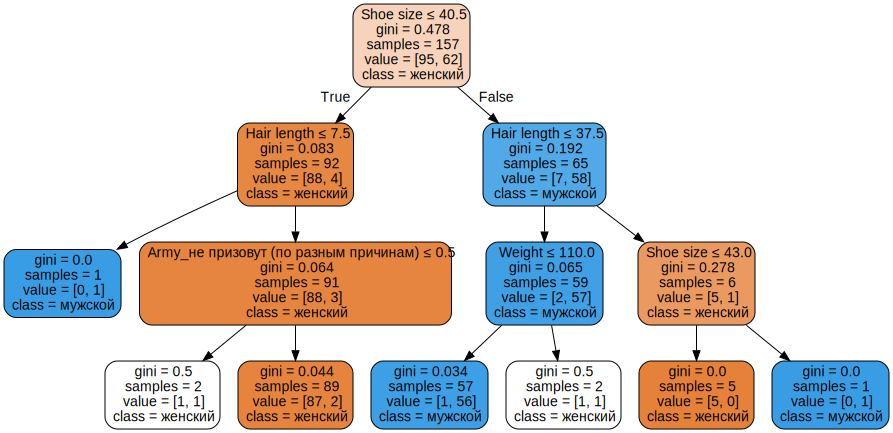

In [21]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=['Shoe size', 'Growth', 'Hair length', 'Computer science rating', 'Weight', 'Army_не призовут (по разным причинам)', 'Coin_Решка'],  class_names=['женский', 'мужской'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [22]:
df_test=pd.read_csv('students_test.csv')
df_test_cut=df_test[['Army', 'Shoe size', 'Growth', 'Hair length', 'Coin', 'Computer science rating', 'Weight', 'Sex']]
df_test_cut=df_test_cut.dropna()

df_test_cut=pd.get_dummies(df_test_cut, drop_first=True)
df_test_cut['Predict']=model.predict(df_test_cut.drop('Sex_мужской', axis=1).values.reshape(-1,7))

pd.crosstab(df_test_cut['Predict'], df_test_cut['Sex_мужской'])

Sex_мужской,0,1
Predict,,
0,46,1
1,1,29
